_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

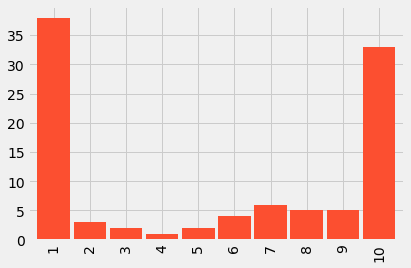

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

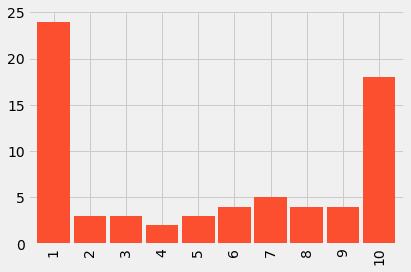

In [3]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [6]:
display(example)

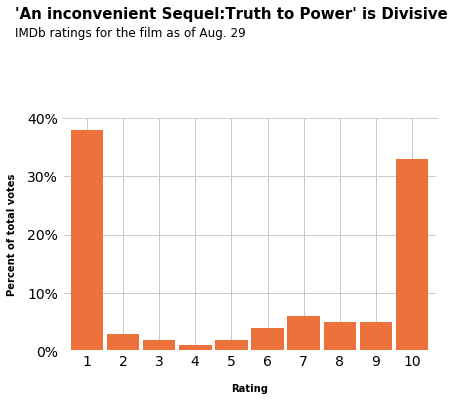

In [149]:
plt.style.use('fivethirtyeight')
fig = plt.figure()

# Plot, colors, and bar width
ax = fake.plot.bar(color='#ED713A', width=0.9, edgecolor=None)
fig.patch.set_facecolor('white')


# Set background color and y-axis range
ax.set(yticks=range(0, 50, 10), facecolor='white');

# Add title and subtitle
ax.text(x=-2, y=57, s="'An inconvenient Sequel:Truth to Power' is Divisive", fontsize=15, fontweight='bold')
ax.text(x=-2, y=54, s="IMDb ratings for the film as of Aug. 29", fontsize=12)

# Change the x ticks to vertical
plt.xticks(rotation=0)

# Add labels to x and y
plt.ylabel('Percent of total votes', fontsize=10, fontweight='bold', labelpad=10)
plt.xlabel('Rating', fontsize=10, fontweight='bold', labelpad=15)

# Change the y ticks to percents
vals = ax.get_yticks()
ax.set_yticklabels(['{}%'.format(y) for y in vals]);

# Change the color of the border
ax.spines['top'].set_color('#cfcfcf')
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [223]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=1150'

example = Image(url=url, width=400)

display(example)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')

In [0]:
subset = df.loc[15]

In [0]:
# Remove unneeded indicies
for index in subset.index:
  if 'frequency' in index or 'alcohol' in index:
    subset = subset.drop(index)
    
    
subset = subset.drop(['age', 'n'])

# Rename indicies
old_indices = [x for x in subset.index]
new_indices = [x.split('-')[0] for x in subset.index]
index_dict = dict(zip(old_indices, new_indices))
subset = subset.rename(index=index_dict)
# Sort the values
subset = subset.sort_values()

# Capitilize indices
subset.index = subset.index.str.title()

In [0]:
# Change some indices to match example
subset = subset.rename(index={'Pain': 'Pain Releiver', 'Oxycontin': 'OxyContin'})

In [437]:
subset.head()

Heroin          0.1
Inhalant        0.2
Meth            0.2
Sedative        0.2
Hallucinogen    0.3
Name: 15, dtype: object

Text(7.55, 10.8, '7.3%')

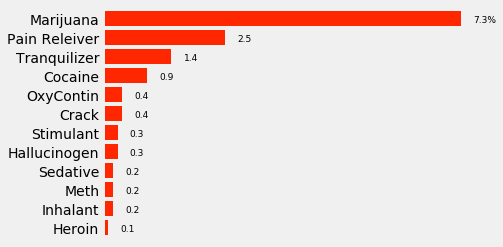

In [451]:
plt.style.use('fivethirtyeight')
fig = plt.figure
# Plot, change color to red
ax = subset.plot.barh(color='#FE2700', width=.8)

# Remove X ticks and remove gridlines
ax.set_xticks([])
ax.grid(False)

# Add values to the end of each bar
for pos, value in enumerate(subset):
  if pos < 11:
    ax.text(value + .25, pos - .2, str(value), fontsize=9)
ax.text(7.55, 10.8, '7.3%', fontsize=9)